In [55]:
import os

# Ignore numpy warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
#%matplotlib notebook

# Use seaborn settings.
import seaborn as sns
sns.set(
        #context="paper",
        context="talk",
        #context="poster",
        style='darkgrid',
        #style="dark",
        #palette='deep',
        font='sans-serif', 
        #font_scale=1.0, 
        #color_codes=False, 
        rc={'figure.figsize': (12, 8.0)}, # width and height in inches.
        #rc={'figure.figsize': (12, 12.0)}, # width and height in inches.
)

import IPython

def _embed(src, width="800", height="400"):
    return IPython.display.IFrame(src=src, width=str(width), height=str(height))

from IPython.core.magic import (register_line_magic, register_cell_magic,
                                register_line_cell_magic)

@register_line_magic
def embed(line):
    "my line magic"
    #return line
    return _embed(line)

# We delete these to avoid name conflicts for automagic to work
del embed
#del lcmagic

# Theme
# import jtplot module in notebook
#from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
#jtplot.style(theme='monokai')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
#jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
#jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

# reset default matplotlib rcParams
#jtplot.reset()

from abipy import abilab
import abipy.data as abidata

si_pseudo = os.path.join(abidata.pseudo_dir, "14si.pspnc")

# New features of AbiPy v0.7

### M. Giantomassi and the AbiPy group

9th international ABINIT developer workshop<br> 
<small>20-22nd May 2019 - Louvain-la-Neuve, Belgium</small>

<!-- link rel="stylesheet" href="reveal.js/css/theme/sky.css" id="theme" -->
<img src="./assets/intro_logos.png" width="85%" heigh="15%" align="center">
<hr> 

* These slides have been generated using [jupyter](https://jupyter.org), [nbconvert](https://github.com/jupyter/nbconvert) and [revealjs](https://revealjs.com/)
* The notebook can be downloaded from this [github repo](https://github.com/gmatteo/abipy_intro_abidev2019)
* To install and configure the software, follow these [installation instructions](https://github.com/abinit/abipy#getting-abipy)

Use the Space key to navigate through all slides.

<img src="./assets/abipy_logo.jpg" width="55%" align="center">

## What is AbiPy?

#### Python package for:

   * Generating ABINIT input files automatically
   * Post-processing output results (*netcdf* and *text* files)
   * Interfacing ABINIT with external tools (e.g. [Vesta](http://jp-minerals.org/vesta/en/))
   * Creating and executing workflows (band structures, phonons, $GW$…)

#### Why python?

   * Easy to use and to learn
   * Great support for science ([numpy](http://www.numpy.org/), [scipy](https://www.scipy.org/), [pandas](http://pandas.pydata.org/), [matplotlib](https://matplotlib.org/) …)
   * Interactive environments ([ipython](http://ipython.org/), [jupyter notebooks](https://jupyter.org/), GUIs)
   * More powerful and flexible than Fortran for implementing the high-level logic needed in modern ab-initio workflows
   * [pymatgen](https://github.com/materialsproject) ecosystem and the [materials project database](https://www.materialsproject.org/)…

## AbiPy design principles

* Extend the pymatgen code-base with ABINIT-specific objects
* Layered structure designed for different use-cases:
        
     * Post-processing tools and command-line interfaces
     * API to automate calculations and data analysis
     * High-throughput infrastructure ([abiflows](https://github.com/abinit/abiflows), [fireworks](https://github.com/materialsproject/fireworks), [mongodb](https://www.mongodb.com/))
     
* Closely connected to the ABINIT executable:

    * CPU-intensive algorithms performed by ABINIT (Fortran + MPI + OpenMP)
    * Glue code implemented in python
   
* ABINIT and AbiPy communicate through [netcdf](https://www.unidata.ucar.edu/software/netcdf/docs/) files

    * Portable binary format implemented in C
    * Fortran/Python bindings and support for parallel MPI-IO (HDF5)
    * [ETSF-IO specifications](https://www.etsf.eu/fileformats) for crystalline structures, wavefunctions, densities…

## How to install AbiPy

<!-- From the most simple to the most complex one, you have three options:-->

Using [pip](https://pypi.org/project/pip/) and python wheels:

        pip install abipy --user

Using [conda](https://conda.io/en/latest/) (*recommended*):

        conda install abipy --channel abinit 

From the [github repository](https://github.com/abinit/abipy) (*develop mode*):

        git clone https://github.com/abinit/abipy.git
        cd abipy 
        python setup.py develop
    
<!--
https://pypi.org/project/abipy/
https://anaconda.org/abinit/abipy
-->

<hr>

For further info see http://abinit.github.io/abipy/installation.html

## AbiPy documentation

<!--
* http://abinit.github.io/abipy/index.html

* Jupyter notebooks 
* Gallery of matplotlib examples and flows
* abitutorial github repo with additional examples


<img src="./assets/abipy_doc_homepage.png" width="100%" align="center">
-->

In [56]:
%embed https://abinit.github.io/abipy/index.html

##  Jupyter notebooks with [examples and lessons](https://nbviewer.jupyter.org/github/abinit/abitutorials/blob/master/abitutorials/index.ipynb) 

<!-- img src="./assets/abipy_notebooks.png" width="100%" align="center" -->

In [57]:
%embed https://nbviewer.jupyter.org/github/abinit/abitutorials/blob/master/abitutorials/index.ipynb

## Files supported by AbiPy

* *GSR.nc* ➝ Ground-state results produced by SCF/NSCF runs
* *HIST.nc* ➝ Structural relaxation and molecular dynamics
* *FATBANDS.nc* ➝ Fatbands and LM-projected DOS for electrons
* *DDB*: ➝ dynamical matrix, Born effective charges, elastic constants…
* *SIGRES.nc* ➝ $GW$ calculations ($\Sigma^{e-e}$ self-energy)
* *MDF.nc* ➝ Bethe-Salpeter calculations
* *ABIWAN.nc* ➝ *netcdf* file produced by Abinit with wannier90 results 
* *SIGEPH.nc* ➝ electron-phonon self-energy ($\Sigma^{e-ph}$)
* …

#### Jupter notebooks with examples available  [here](https://nbviewer.jupyter.org/github/abinit/abitutorials/blob/master/abitutorials/index.ipynb#Output-files-supported-by-AbiPy)

<img src="./assets/Data-Analysis.jpg" width="95%" align="center">

* Since AbiPy is not restricted to high-throughput, we'll show how to use the terminal to analyze calculations

* Well, a python script would be much more flexible but the goal here is to show 
  that one can replace *grep*, *vim*, *gnuplot* with AbiPy

<div class="alert alert-warning">
No perl scripts were harmed in the making of this notebook
</div>

## AbiPy post-processing tools

* Main entry point: 

  ```python
       from abipy import abilab
  abifile = abilab.abiopen("filename.nc")
  ```
        
  where *filename.nc* is a *netcdf* file (support also text files e.g. *run.abo*, *run.log*, *out_DDB*)

* *abifile* is the *AbiFile* subclass associated to the given file extension:

    1. GSR.nc ➝ *GsrFile*
    2. HIST.nc ➝ *HistFile*
    3. More than 45 file extensions supported (see `abiopen.py --help`) 
    

* Command line interface: use `abiopen.py FILE` to:

     * open the file inside the [*ipython*](https://ipython.org/) terminal
     * print info to terminal (`--print` option)
     * produce a predefined set of *matplotlib*  figures (`--expose` option)
     * generate [jupyter notebooks](https://jupyter.org/) (`--notebook` option)

## Command line interface

* *abiopen.py* ➝ Open output files inside *ipython* or print/visualize file
* *abistruct.py* ➝ Operate on crystalline structures read from file
* *abicomp.py* ➝ Compare multiple files (i.e. convergence studies)
* *abiview.py* ➝ Quick visualization of output files
* *abinp.py* ➝ Generate input files for typical calculations
    
### Documentation 

* `abistruct.py --help` for manpage
* `abistruct.py COMMAND --help` for help about `COMMAND`
<hr>
HTML documentation available at http://abinit.github.io/abipy/scripts/index.html

### Examples
<p></p>

```shell
abistruct.py spglib si_scf_GSR.nc
abistruct.py convert si_scf_GSR.nc -f cif
abiopen.py si_scf_GSR.nc --print
```

### and many more...

#### Print results of ground-state calculations:

In [58]:
!abiopen.py si_scf_GSR.nc --print

================================= File Info =================================
Name: si_scf_GSR.nc
Directory: /Users/gmatteo/talks/abipy_intro_abidev2019
Size: 14.83 kb
Access Time: Wed May 15 23:30:08 2019
Modification Time: Sun May 12 04:20:35 2019
Change Time: Sun May 12 04:20:35 2019

================================= Structure =================================
Full Formula (Si2)
Reduced Formula: Si
abc   :   3.866975   3.866975   3.866975
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a     b     c  cartesian_forces
---  ----  ----  ----  ----  -----------------------------------------------------------
  0  Si    0     0     0     [-5.89948302e-27 -1.93366148e-27  2.91016902e-27] eV ang^-1
  1  Si    0.25  0.25  0.25  [ 5.89948302e-27  1.93366148e-27 -2.91016902e-27] eV ang^-1

Abinit Spacegroup: spgid: 227, num_spatial_symmetries: 48, has_timerev: True, symmorphic: True

Stress tensor (Cartesian coordinates in GPa):

 [7.86452261e-11 5.21161758e+00 0.00000000e+0

#### To produce a predefined set of matplotlib figures, use:
<p></p>

```shell
abiopen.py si_nscf_GSR.nc --expose
```    
    
<img src="assets/abiopen_expose.png" width="75%" align="center" alt="abiopen_expose">

#### To produce a predefined set of matplotlib figures, use:
<p></p>

```shell
abiopen.py mgb2_kpath_FATBANDS.nc --expose --seaborn
```    

<img src="assets/mgb2_fatbands.png" width="100%" align="center" alt="abiopen_expose">

#### Replace *--expose* with *--notebook* to generate a jupyter notebook with predefined python code

#### *abiopen.py* supports output files (note *abo* extension):

In [59]:
!abiopen.py gs_dfpt.abo -p 

ndtset: 3, completed: True
Full Formula (C2)
Reduced Formula: C
abc   :   2.508336   2.508336   2.508336
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  C     0     0     0
  1  C     0.25  0.25  0.25

Abinit Spacegroup: spgid: 227, num_spatial_symmetries: 48, has_timerev: True, symmorphic: True

========================= Dimensions of calculation =========================
         intxc  ionmov  iscf  lmnmax  lnmax  mgfft  mpssoang  mqgrid  natom  \
dataset                                                                       
1            0     0.0     7       1      1     24         2    3001      2   
2            0     NaN     7       1      1     24         2    3001      2   
3            0     NaN     7       1      1     24         2    3001      2   

         nloc_mem  nspden  nspinor  nsppol  nsym  n1xccc  ntypat  occopt  \
dataset                                                                    
1           

#### and log files as well:

In [60]:
!abiopen.py run.log -p 

Events found in /Users/gmatteo/talks/abipy_intro_abidev2019/run.log

[1] <AbinitComment at m_dtfil.F90:1082>
    Output file: run.abo already exists.
    
[2] <AbinitComment at m_dtfil.F90:1106>
    Renaming old run.abo to run.abo0001
    
[3] <AbinitWarning at m_mpinfo.F90:2295>
    nkpt*nsppol (29) is not a multiple of nproc_kpt (2)
    The k-point parallelisation is not efficient.
    
[4] <AbinitWarning at m_mpinfo.F90:2295>
    nkpt*nsppol (29) is not a multiple of nproc_kpt (2)
    The k-point parallelisation is not efficient.
    
[5] <AbinitComment at m_xgScalapack.F90:237>
    xgScalapack in auto mode
    
[6] <AbinitWarning at m_phonons.F90:3215>
    ph_nqpath <= 0 or ph_ndivsm <= 0. Phonon bands won't be produced. returning
    
[7] <AbinitComment at m_xgScalapack.F90:237>
    xgScalapack in auto mode
    
[8] <AbinitWarning at m_phonons.F90:3215>
    ph_nqpath <= 0 or ph_ndivsm <= 0. Phonon bands won't be produced. returning
    
num_errors: 0, num_warnings: 4, num_comments

#### If you are still using perl scripts to extract data from the main output file, check this out:
<p></p>

```sh
abiopen.py gs_dfpt.abo --expose --seaborn
```

<img src="assets/abiopen_abo.png" width="75%" align="center">

#### The introduction of Yaml documents in the main output (see Theo's talk) will faciliate the implementation of new post-processing tools...

<img src="assets/abistruct.png" width="35%" align="center">

#### Convert structure from netcdf format to CIF:

In [61]:
!abistruct.py convert si_scf_GSR.nc -f cif

# generated using pymatgen
data_Si
_symmetry_space_group_name_H-M   'P 1'
_cell_length_a   3.86697464
_cell_length_b   3.86697464
_cell_length_c   3.86697464
_cell_angle_alpha   60.00000000
_cell_angle_beta   60.00000000
_cell_angle_gamma   60.00000000
_symmetry_Int_Tables_number   1
_chemical_formula_structural   Si
_chemical_formula_sum   Si2
_cell_volume   40.88829228
_cell_formula_units_Z   2
loop_
 _symmetry_equiv_pos_site_id
 _symmetry_equiv_pos_as_xyz
  1  'x, y, z'
loop_
 _atom_site_type_symbol
 _atom_site_label
 _atom_site_symmetry_multiplicity
 _atom_site_fract_x
 _atom_site_fract_y
 _atom_site_fract_z
 _atom_site_occupancy
  Si  Si1  1  0.000000  0.000000  0.000000  1
  Si  Si2  1  0.250000  0.250000  0.250000  1



#### Are you still using *cut3d* to export the structure in a format that other applications can understand?
<p></p>


```sh
abistruct.py visualize run_si02.abi
```

<img src="assets/sio2_vesta.png" width="80%" align="center">

#### Supports also *ovito*, *xcrysden*, *vtk*, *mayavi*, *matplotlib*  (Use *--application*)

#### Read structure from FILE and invoke [spglib](https://atztogo.github.io/spglib/) to analyze symmetries:

In [62]:
!abistruct.py spglib si_scf_GSR.nc

Full Formula (Si2)
Reduced Formula: Si
abc   :   3.866975   3.866975   3.866975
angles:  60.000000  60.000000  60.000000

Spglib space group info (magnetic symmetries not taken into account).
Spacegroup: Fd-3m (227), Hall: F 4d 2 3 -1d, Abinit spg_number: 227
Crystal_system: cubic, Lattice_type: cubic, Point_group: m-3m

  Idx  Symbol    Reduced_Coords              Wyckoff      EqIdx
-----  --------  --------------------------  ---------  -------
    0  Si        +0.00000 +0.00000 +0.00000  (2a)             0
    1  Si        +0.25000 +0.25000 +0.25000  (2a)             0


#### It works with any file providing a structure object (*.nc*, .abi, *.cif* …) 

#### Read structure from FILE and print ABINIT variables for k-path:

In [63]:
!abistruct.py kpath si_scf_GSR.nc

# Abinit Structure
 natom 2
 ntypat 1
 typat 1 1
 znucl 14
 xred
    0.0000000000    0.0000000000    0.0000000000
    0.2500000000    0.2500000000    0.2500000000
 acell    1.0    1.0    1.0
 rprim
    6.3285005521    0.0000000000    3.6537614973
    2.1095001840    5.9665675402    3.6537614973
    0.0000000000    0.0000000000    7.3075229946

# K-path in reduced coordinates:
# tolwfr 1e-20 iscf -2 getden ??
 ndivsm 10
 kptopt -11
 kptbounds
    +0.00000  +0.00000  +0.00000  # $\Gamma$
    +0.50000  +0.00000  +0.50000  # X
    +0.50000  +0.25000  +0.75000  # W
    +0.37500  +0.37500  +0.75000  # K
    +0.00000  +0.00000  +0.00000  # $\Gamma$
    +0.50000  +0.50000  +0.50000  # L
    +0.62500  +0.25000  +0.62500  # U
    +0.50000  +0.25000  +0.75000  # W
    +0.50000  +0.50000  +0.50000  # L
    +0.37500  +0.37500  +0.75000  # K
    +0.62500  +0.25000  +0.62500  # U
    +0.50000  +0.00000  +0.50000  # X


#### Read structure from FILE, find little group of k-point, print irreps character table

In [64]:
!abistruct.py lgk si_scf_GSR.nc -k 0 0 0


================================= Structure =================================
Full Formula (Si2)
Reduced Formula: Si
abc   :   3.866975   3.866975   3.866975
angles:  60.000000  60.000000  60.000000

Spglib space group info (magnetic symmetries not taken into account).
Spacegroup: Fd-3m (227), Hall: F 4d 2 3 -1d, Abinit spg_number: 227
Crystal_system: cubic, Lattice_type: cubic, Point_group: m-3m

  Idx  Symbol    Reduced_Coords              Wyckoff      EqIdx
-----  --------  --------------------------  ---------  -------
    0  Si        +0.00000 +0.00000 +0.00000  (2a)             0
    1  Si        +0.25000 +0.25000 +0.25000  (2a)             0


================================ Little Group ================================
Kpoint-group: m-3m, Oh (221), Kpoint: [0.0, 0.0, 0.0], Symmorphic: True
 
Oh     1+ [1]   2+ [3]   3+ [8]   2+ [6]   4+ [6]  -2- [1]  -2+ [3]  -6- [8]  -2+ [6]  -4+ [6]
Irrep                                                                                       

#### Connect to the materials project database to find similar structures.


In [65]:
!abistruct.py mp_match si_scf_GSR.nc


# Found 1 structures in Materials Project database (use `verbose` to get further info)

 
########################## abivars input for mp-149 ##########################
# Full Formula (Si2)
# Reduced Formula: Si
# abc   :   3.866975   3.866975   3.866975
# angles:  60.000000  60.000000  60.000000
# 
# Spglib space group info (magnetic symmetries not taken into account).
# Spacegroup: Fd-3m (227), Hall: F 4d 2 3 -1d, Abinit spg_number: None
# Crystal_system: cubic, Lattice_type: cubic, Point_group: m-3m
# 
#   Idx  Symbol    Reduced_Coords              Wyckoff      EqIdx
# -----  --------  --------------------------  ---------  -------
#     0  Si        +0.87500 +0.87500 +0.87500  (2a)             0
#     1  Si        +0.12500 +0.12500 +0.12500  (2a)             0

 natom 2
 ntypat 1
 typat 1 1
 znucl 14
 xred
    0.8750000000    0.8750000000    0.8750000000
    0.1250000000    0.1250000000    0.1250000000
 acell    1.0    1.0    1.0
 rprim
    6.3285005334    0.0000000000    3.653761

In [66]:
#!abistruct.py mp_search LiF

<img src="assets/abiview.png" width="35%" align="center">

#### Want to know what's happening in the structural relaxation?
<p></p>

```sh
abiview.py hist sic_relax_HIST.nc
```

<p></p>
<img src="assets/abiview_hist.png" width="85%" align="center">

#### Need to call *anaddb* to compute and visualize ph-bands and DOS from DDB?
<p></p>

```sh
abiview.py ddb ZnSe_hex_qpt_DDB --seaborn
```

<img src="assets/abiview_ddb.png" width="90%" align="center">

#### Need to get a quick look at the Fermi surface?
<p></p>

```
abiview.py fs mgb2_kmesh181818_FATBANDS.nc
```
<p></p>
<img src="assets/mgb2_fs.png" width="80%" align="center">

#### Use *-a xsf* for Xcrysden or *-a mayavi* for Mayavi backend

<img src="assets/abicomp.png" width="35%" align="center">

## Abipy Robots

* High-level interface to operate on <u>multiple files</u> with the same file extension

* Useful for:

     * convergence studies
     * producing multiple plots
     * building [Pandas dataframes](https://pandas.pydata.org/) (data in tabular format powered by python)

* Each *Robot* is associated to a file extension, *e.g.* 

     * GSR.nc ➝ *GsrRobot*
     * DDB ➝ *DdbRobot*
     
* *Robots* can be constructed from:

    1. List of filenames
    2. Directories and regular expressions
    
* Command line interface provided by the *abicomp.py* script:

* To generate notebook to compare multiple *GSR* files, use:

            abicomp.py gsr out1_GSR.nc  out2_GSR.nc --notebook

#### To compare multiple structures 

In [67]:
# Note shell wildcard characters and Unix `find` inside backticks
!abicomp.py structure *.cif si_nscf_GSR.nc `find . -name *_DDB`

Spglib options: symprec= 0.001 angle_tolerance= 5.0
Lattice parameters:
                  formula  natom  alpha  beta  gamma         a         b  \
AlAs.cif          Al1 As1      2   60.0  60.0   60.0  3.970101  3.970101   
si.cif                Si2      2   60.0  60.0   60.0  3.866975  3.866975   
si_nscf_GSR.nc        Si2      2   60.0  60.0   60.0  3.866975  3.866975   
ZnSe_hex_qpt_DDB  Zn2 Se2      4   90.0  90.0  120.0  4.050187  4.050187   

                         c     volume abispg_num spglib_symb  spglib_num  \
AlAs.cif          3.970101  44.247584       None       F-43m         216   
si.cif            3.866975  40.888292       None       Fd-3m         227   
si_nscf_GSR.nc    3.866975  40.888292        227       Fd-3m         227   
ZnSe_hex_qpt_DDB  6.652328  94.504936          0      P6_3mc         186   

                 spglib_lattice_type  
AlAs.cif                       cubic  
si.cif                         cubic  
si_nscf_GSR.nc                 cubic  
ZnSe_hex_q

In [68]:
#plotter = abilab.ElectronBandsPlotter()
#plotter.add_ebands(label="BZ sampling", bands="si_scf_GSR.nc")
#plotter.add_ebands(label="k-path", bands="si_nscf_GSR.nc")
#plotter.gridplot(with_gaps=True);

#### Use *ElectronBandsPlotter* to visualize multiple band structures:
<p></p>

```sh
abicomp.py ebands *_GSR.nc
```

<p></p>

<img src="assets/abicomp_ebands.png" width="85%" align="center">

#### Pandas dataframe printed to terminal:

```text
               nsppol  nspinor  nspden  nkpt  nband  nelect    fermie  \
si_nscf_GSR.nc       1        1       1    14      8     8.0  5.598453
si_scf_GSR.nc        1        1       1    29      8     8.0  5.598453

               formula  natom  alpha  beta  gamma         a         b  \
si_nscf_GSR.nc     Si2      2   60.0  60.0   60.0  3.866975  3.866975
si_scf_GSR.nc      Si2      2   60.0  60.0   60.0  3.866975  3.866975

                       c     volume abispg_num spglib_symb  spglib_num  \
si_nscf_GSR.nc  3.866975  40.888292        227       Fd-3m         227
si_scf_GSR.nc   3.866975  40.888292        227       Fd-3m         227

               spglib_lattice_type scheme  occopt  tsmear_ev  bandwidth_spin0  \
si_nscf_GSR.nc               cubic   none       1   0.272114        11.855854
si_scf_GSR.nc                cubic   none       1   0.272114        11.855874

                fundgap_spin0  dirgap_spin0  gap_type  \
si_nscf_GSR.nc       0.524340      2.531828  indirect
si_scf_GSR.nc        0.562277      2.531798  indirect

                                   fundgap_kstart              fundgap_kend  \
si_nscf_GSR.nc  [+0.000, +0.000, +0.000] $\Gamma$  [+0.000, +0.429, +0.429]
si_scf_GSR.nc            [+0.000, +0.000, +0.000]  [+0.375, +0.375, +0.000]

                                    dirgap_kstart  \
si_nscf_GSR.nc  [+0.000, +0.000, +0.000] $\Gamma$
si_scf_GSR.nc            [+0.000, +0.000, +0.000]

                                      dirgap_kend
si_nscf_GSR.nc  [+0.000, +0.000, +0.000] $\Gamma$
si_scf_GSR.nc            [+0.000, +0.000, +0.000]
```

### Post-processing the DFPT results available in the MP database

* More than 1500 DFPT calculations done with abiflows ([Petretto et al.](https://www.nature.com/articles/sdata201865))
* Results available on the materials project website (including the *DDB* files) 

<hr>

Let's assume we want to reuse the raw data for our research work:

   * Handling 1500 tabs in the web browser is not feasible
   * We need a <u>programmatic</u> interface to automate stuff. 

With python we can easily connect the different parts of the puzzle:

* REST API to get the raw data (*DDB*) from the MP database
* Computation of phonons, thermodinamical properties, Born effective charges, dielectric tensor, IR spectrum with ABINIT
* Post-processing with AbiPy

For a more comprehensive discussion see this 
[abitutorial](https://nbviewer.jupyter.org/github/abinit/abitutorials/blob/master/abitutorials/ddb.ipynb)

<!--
The results for the rocksalt phase of MgO are available at https://materialsproject.org/materials/mp-1009129/
-->

## How to use DdbRobot to perform convergence studies

##### Let's use the *DdbRobot* to compare phonons obtained with different k-meshes and smearing values:

In [69]:
paths = [
    "mgb2_888k_0.01tsmear_DDB",
    "mgb2_888k_0.04tsmear_DDB",
    "mgb2_121212k_0.01tsmear_DDB",
    "mgb2_121212k_0.04tsmear_DDB",
]

paths = [os.path.join(abidata.dirpath, "refs", "mgb2_phonons_nkpt_tsmear", f) 
         for f in paths]

robot = abilab.DdbRobot()
for i, path in enumerate(paths):
    robot.add_file(path, path)

In [70]:
# Define function to change labels:
func = lambda ddb: "nkpt: %s, tsmear: %.2f" % (
    ddb.header["nkpt"], ddb.header["tsmear"])

robot.remap_labels(func)
robot

Label                    Relpath
-----------------------  ------------------------------------------------------------------------------------------
nkpt: 256, tsmear: 0.01  ../../git_repos/abipy/abipy/data/refs/mgb2_phonons_nkpt_tsmear/mgb2_888k_0.01tsmear_DDB
nkpt: 256, tsmear: 0.04  ../../git_repos/abipy/abipy/data/refs/mgb2_phonons_nkpt_tsmear/mgb2_888k_0.04tsmear_DDB
nkpt: 864, tsmear: 0.01  ../../git_repos/abipy/abipy/data/refs/mgb2_phonons_nkpt_tsmear/mgb2_121212k_0.01tsmear_DDB
nkpt: 864, tsmear: 0.04  ../../git_repos/abipy/abipy/data/refs/mgb2_phonons_nkpt_tsmear/mgb2_121212k_0.04tsmear_DDB

<!-- We are usually interested in the convergence behavior with respect to one or two parameters of 
the calculations.-->

#### Now we can build a dataframe with the most important parameters:

In [71]:
robot.get_params_dataframe()

,nkpt,nsppol,ecut,tsmear,occopt,ixc,nband,usepaw
"nkpt: 256, tsmear: 0.01",256,1,35.0,0.01,4,1,8,0
"nkpt: 256, tsmear: 0.04",256,1,35.0,0.04,4,1,8,0
"nkpt: 864, tsmear: 0.01",864,1,35.0,0.01,4,1,8,0
"nkpt: 864, tsmear: 0.04",864,1,35.0,0.04,4,1,8,0


#### and check that all DDBs have been computed with the same crystalline structure:

In [72]:
robot.get_lattice_dataframe()

,formula,natom,alpha,beta,gamma,a,b,c,volume,abispg_num,spglib_symb,spglib_num,spglib_lattice_type
"nkpt: 256, tsmear: 0.01",Mg1 B2,3,90.0,90.0,120.0,3.086,3.086,3.523,29.055953,0,P6/mmm,191,hexagonal
"nkpt: 256, tsmear: 0.04",Mg1 B2,3,90.0,90.0,120.0,3.086,3.086,3.523,29.055953,0,P6/mmm,191,hexagonal
"nkpt: 864, tsmear: 0.01",Mg1 B2,3,90.0,90.0,120.0,3.086,3.086,3.523,29.055953,0,P6/mmm,191,hexagonal
"nkpt: 864, tsmear: 0.04",Mg1 B2,3,90.0,90.0,120.0,3.086,3.086,3.523,29.055953,0,P6/mmm,191,hexagonal


* Dataframes can be exported to different formats: CSV, $Latex$, JSON, Excel, ...
* High-level plotting interface provided by [seaborn](https://seaborn.pydata.org/)
* Explore your *DataFrames* inside *jupyter* with [qgrid](https://github.com/quantopian/qgrid)
* Use [ene_table.to_clipboard()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_clipboard.html#pandas-dataframe-to-clipboard) 
to copy to clipboard and paste into spreadsheet editor

#### To analyze the effect of k-sampling/smearing on the vibrational properties:

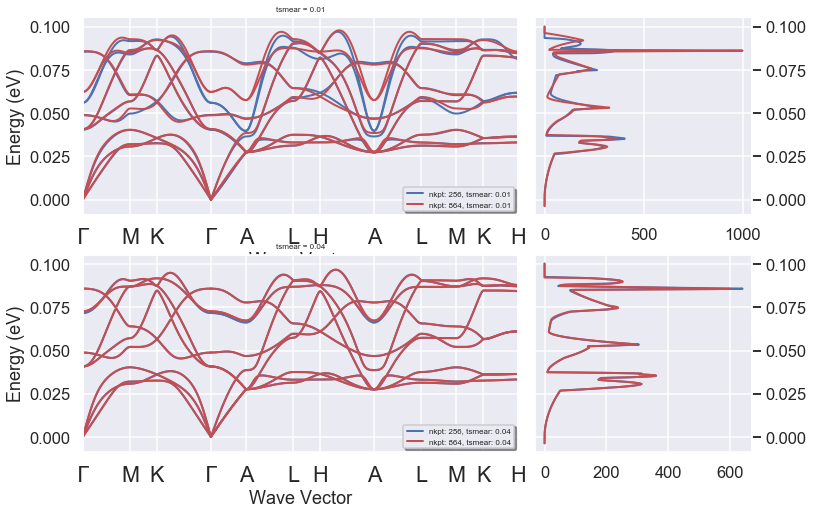

In [73]:
# Invoke anaddb and store results
r = robot.anaget_phonon_plotters(nqsmall=2)

r.phbands_plotter.gridplot_with_hue("tsmear", with_dos=True);

#### Python function to visualize electronic and vibrational properties downloaded from the MP database:

In [74]:
def plot_electrons_and_phonons(mpids):
    # Construct AbiPy ebands from mpids
    ebands_list = [abilab.ElectronBands.from_mpid(mpid) for mpid in mpids]

    # Get DDB files from the MP website and run anaddb to get phonon bands.
    phbands_list = []
    for i, mpid in enumerate(mpids):
        ddb = abilab.DdbFile.from_mpid(mpid)
        # Call anaddb to compute phonon bands
        phbst, _ = ddb.anaget_phbst_and_phdos_files(nqsmall=0)
        phbands_list.append(phbst.phbands)
        phbst.close()

    # Build matplotlib grid. The figure has (len(mpids), 2) subplots
    nrows, ncols = len(mpids), 2
    ax_mat, fig, plt = abilab.get_axarray_fig_plt(None, nrows=nrows, ncols=ncols,
                                                  sharex=False, sharey=False, 
                                                  squeeze=False)
    
    for i, (ebands, phbands) in enumerate(zip(ebands_list, phbands_list)):
        ebands.plot(ax=ax_mat[i, 0], with_gaps=True, ylims=(-5, 10), 
                    max_phfreq=phbands.maxfreq, show=False)
        phbands.plot(ax=ax_mat[i, 1], show=False)
        
        # Hide labels
        ax_mat[i, 1].yaxis.label.set_visible(False)
        if i != len(ebands_list) - 1:
            for ax in ax_mat[i]: ax.xaxis.label.set_visible(False)

    return fig

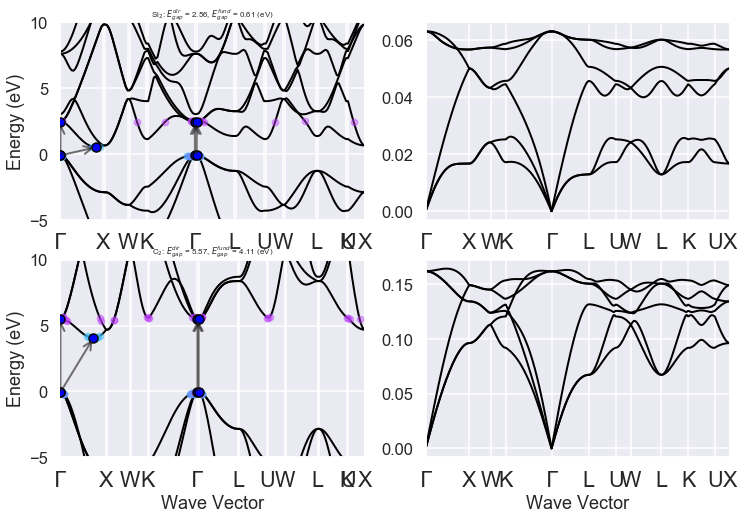

In [75]:
plot_electrons_and_phonons(mpids=["mp-149", "mp-66"]); # Si and Diamond

##### Qualitative analysis of possible e-ph scattering channels with less than 20 lines of code!

## *AbinitInput* object 

Programmatic interface to generate input files:

* *Dict-like* object storing ABINIT variables 
* Methods to set multiple variables (*e.g.* **k**-path from *structure*)
* Factory functions to generate input files with minimal effort

Can invoke ABINIT to get important parameters such as:

  * list of **k**-points in the IBZ
  * list of irreducible DFPT perturbations
  * list of possible configurations for MPI jobs (*npkpt*, *npfft*, *npband* …)
     
#### To build an input, we need a *structure* and a list of *pseudos*:

### Input file for band structure calculation + DOS

1. GS run to get the density 
2. NSCF run along high-symmetry **k**-path
3. NSCF run with **k**-mesh to compute the DOS

In [76]:
multi = abilab.ebands_input(structure="si.cif", 
                            pseudos="14si.pspnc",
                            ecut=8, 
                            spin_mode="unpolarized", 
                            smearing=None, 
                            dos_kppa=5000)

multi.get_vars_dataframe("kptopt", "iscf", "ngkpt")

,kptopt,iscf,ngkpt
dataset 0,1,None,"[8, 8, 8]"
dataset 1,-11,-2,None
dataset 2,1,-2,"[14, 14, 14]"


#### To build an input for SCF+NSCF run with (relaxed) structure from the materials project database:
<p></p>

        abinp.py ebands mp-149          

#### Inside the notebook, one gets the HTML representation with links to the documentation:

In [77]:
multi[0]

<AbinitInput at 120944385104>

#### $GW$ calculations with the plasmon-pole model. The calculation consists of:

1. GS run to compute the density 
2. nscf-run to produce a WFK file with *nscf_nband* states
3. Input files to compute the screening ($W$) and the self-energy ($\Sigma^{e-e} = GW$)

In [78]:
multi = abilab.g0w0_with_ppmodel_inputs(
    structure="si.cif", pseudos="14si.pspnc", 
    kppa=1000, nscf_nband=50, ecuteps=2, ecutsigx=4, ecut=8, 
    spin_mode="unpolarized")

multi.get_vars_dataframe("optdriver", "ngkpt", "nband", "ecuteps", "ecutsigx")

,optdriver,ngkpt,nband,ecuteps,ecutsigx
dataset 0,None,"[8, 8, 8]",14,None,None
dataset 1,None,"[8, 8, 8]",50,None,None
dataset 2,3,"[8, 8, 8]",50,2,None
dataset 3,4,"[8, 8, 8]",50,2,4


* *nscf_nband*  ➝ number of bands in $GW$ (occ + empty)
* *ecuteps* ➝ planewave cutoff for $W_{G, G'}$ in Hartree 
* *ecutsigx* ➝ cutoff energy for the exchange part $\Sigma_x$
* *kppa* ➝ k-point sampling (#kpts per reciprocal atom)

In [79]:
def make_scf_input(ecut=2, ngkpt=(4, 4, 4)):
    """
    Generate an `AbinitInput` to perform GS calculation for AlAs.

    Args:
        ecut: Cutoff energy in Ha.
        ngkpt: k-mesh divisions

    Return:
        `AbinitInput` object
    """
    gs_inp = abilab.AbinitInput(structure="AlAs.cif",
                                pseudos=["13al.pspnc", "33as.pspnc"])

    # Set the value of the Abinit variables needed for GS runs.
    gs_inp.set_vars(
        nband=4,
        ecut=ecut,
        ngkpt=ngkpt,
        nshiftk=4,
        shiftk=[0.0, 0.0, 0.5,   # This gives the usual fcc Monkhorst-Pack grid
                0.0, 0.5, 0.0,
                0.5, 0.0, 0.0,
                0.5, 0.5, 0.5],
        tolvrs=1.0e-10,
    )

    return gs_inp

In [80]:
def build_flow_alas_phonons():
    """
    Build and return a Flow to compute the dynamical matrix on a (2, 2, 2) qmesh
    as well as DDK and Born effective charges.
    The final DDB with all perturbations will be merged automatically and placed
    in the Flow `outdir` directory.
    """
    from abipy import flowtk
    scf_input = make_scf_input(ecut=6, ngkpt=(4, 4, 4))
    return flowtk.PhononFlow.from_scf_input("flow_alas_phonons", scf_input,
                                            ph_ngqpt=(2, 2, 2), with_becs=True)

#####  Abipy will call Abinit to get the list of DFPT perturbations and…

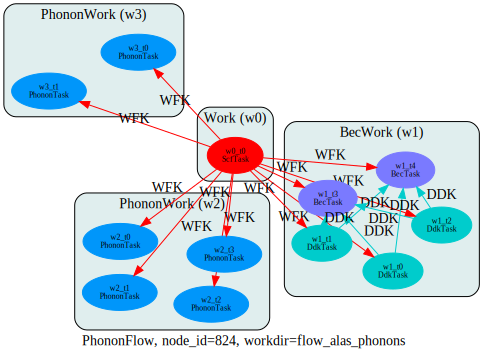

In [81]:
flow_phbands = build_flow_alas_phonons()
flow_phbands.get_graphviz()

## Future developments

* Add support for more netcdf files
* More post-processing tools for MD calculations
* More converters and interfaces for third-party applications
* Integrate AbiPy with JupyterLab to create a flexible graphical enviroment for Abinit exposing (part) 
  of the python API 
* Explore web-based technologies for data analysis and visualization based on plotly and dask. 
  Goal: Toolkit to build web apps to disseminate scientific results. 

<!--
## Lessons learned

* Metadata is as important as data. 
* That's the reason why I use netcdf and why the AbiPy API is easy-to-use
-->